In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import time
import datetime


In [2]:

df_labels=pd.read_csv('drug-label/drug_labels.csv')
df_recalls=pd.read_csv('drug-enforcement/drug_recalls.csv')


In [95]:
df_recalls.head()

,Unnamed: 0,unix,unq_ndc
0,0,1.140761e+09,23731-8100-8
1,1,1.322806e+09,NaN
2,2,1.289369e+09,54868-4033-00
3,3,1.289369e+09,54868-4973-00
4,4,1.329977e+09,NaN


In [8]:
df_labels['spl_product_data_elements'][1234]

"[u'FAMOTIDINE FAMOTIDINE FAMOTIDINE FAMOTIDINE SILICON DIOXIDE magnesium stearate CELLULOSE, MICROCRYSTALLINE STARCH, CORN talc POLYETHYLENE GLYCOL 400 titanium dioxide C119 FAMOTIDINE FAMOTIDINE FAMOTIDINE FAMOTIDINE SILICON DIOXIDE magnesium stearate CELLULOSE, MICROCRYSTALLINE STARCH, CORN talc POLYETHYLENE GLYCOL 400 titanium dioxide C120']"

In [12]:
print len(df_labels)
print df_labels['unq_ndc'].isnull().sum()


105446
18304


In [13]:
df_labels_ndc=df_labels[df_labels['unq_ndc'].isnull()==False].copy()

In [14]:
print len(df_labels_ndc)
print df_labels_ndc['unq_ndc'].isnull().sum()

87142
0


In [15]:
def get_ndc_company(value):
    #value=str(value)
    value_split=value.split('-')
    company=value_split[0]
    return company

def get_ndc_product(value):
    #value=str(value)
    value_split=value.split('-')
    product=value_split[1]
    return product

In [16]:
df_labels_ndc['company']=df_labels_ndc['unq_ndc'].apply(get_ndc_company)
df_labels_ndc['product']=df_labels_ndc['unq_ndc'].apply(get_ndc_product)

In [96]:
df_labels_ndc['company'].head()

0    66336
1    55045
2    54569
3    59220
4     0615
Name: company, dtype: object

In [18]:
df_labels_ndc['product'].head()

0     706
1    1433
2    0322
3    4001
4    0547
Name: product, dtype: object

In [19]:
print df_labels_ndc['company'].count()
print df_labels_ndc['company'].nunique()

87142
5183


In [20]:
print df_labels_ndc['product'].count()
print df_labels_ndc['product'].nunique()

87142
9422


In [21]:
print len(df_recalls)
print df_recalls['unq_ndc'].isnull().sum()

5964
4304


In [22]:
df_recalls_ndc=df_recalls[df_recalls['unq_ndc'].isnull()==False].copy()

In [23]:
print len(df_recalls_ndc)
print df_recalls_ndc['unq_ndc'].isnull().sum()

1660
0


In [24]:
def bad_ndcs(value):
    value_split=value.split('-')
    if (len(value_split)>=2):
        return 1
    else:
        return 0
    

In [25]:
df_recalls_ndc['good_ndcs']=df_recalls_ndc['unq_ndc'].apply(bad_ndcs)

In [26]:
print df_recalls_ndc['good_ndcs'].count()
print df_recalls_ndc['good_ndcs'].sum()

1660
1110


In [27]:
df_recalls_good_ndcs=df_recalls_ndc[df_recalls_ndc['good_ndcs']==1].copy()

In [28]:
len(df_recalls_good_ndcs)

1110

In [29]:
df_recalls_good_ndcs.head()

,Unnamed: 0,unix,unq_ndc,good_ndcs
0,0,1.140761e+09,23731-8100-8,1
2,2,1.289369e+09,54868-4033-00,1
3,3,1.289369e+09,54868-4973-00,1
7,7,1.334639e+09,0409-1258-30,1
9,9,1.336799e+09,0409-1283-31,1


In [30]:
def get_ndc_match(value):
    value_split=value.split('-')
    ndc_match=value_split[0]+'-'+value_split[1]
    return ndc_match

In [31]:
df_recalls_good_ndcs['unq_ndc']=df_recalls_good_ndcs['unq_ndc'].apply(get_ndc_match)

In [98]:
df_recalls_good_ndcs.head()

,Unnamed: 0,unix,unq_ndc,good_ndcs,company,product
0,0,1.140761e+09,23731-8100,1,23731,8100
2,2,1.289369e+09,54868-4033,1,54868,4033
3,3,1.289369e+09,54868-4973,1,54868,4973
7,7,1.334639e+09,0409-1258,1,0409,1258
9,9,1.336799e+09,0409-1283,1,0409,1283


In [99]:
df_recalls_good_ndcs.to_csv('all_ndcs_recalled.csv')

In [33]:
# for index in range(len(df_recalls_ndc)):
#     print df_recalls_ndc.iloc[index][['unq_ndc','good_ndcs']]#,'good_ndcs']
    

In [97]:
len(df_recalls_good_ndcs)

1110

In [34]:
df_recalls_good_ndcs['unq_ndc'].head(100)

0      23731-8100
2      54868-4033
3      54868-4973
7       0409-1258
9       0409-1283
11      55390-039
14      0409-1312
16      0015-3012
17      0603-3888
18     00591-0540
30      50242-903
31      0409-7984
32      0409-7929
35      61703-339
36      61703-339
39      0270-1315
40      0603-3888
42      51079-254
50      62750-005
58      0409-7929
59     61958-0101
63     60505-0773
64      0409-7983
69     60505-0773
70      66758-041
71      63323-064
72      68382-053
76      0536-3086
88      0409-1159
89      0409-1165
          ...    
231    68084-0703
232     62584-143
234     0409-2066
235     67919-011
236     0941-0457
241     0409-7620
242     0409-7929
243     0409-4279
244     0409-4279
245     0409-4699
248     0338-0553
286     0409-7983
299     0409-6727
301     0409-7828
303     0409-7983
304     0338-0049
305     0338-0017
306     0338-0023
307     0338-0117
308     0069-0146
309     67457-493
310     67457-464
311     67457-463
312     67457-462
313     63

In [35]:
# def match_unq_ndc(value):
#     value_split=value.split('-')
#     if (len(value_split)>=2):
#         ndc_num=value_split[0]+value_split[1]
#     else:
#         print value_split
#     return 0

In [36]:
# df_recalls_ndc['unq_ndc_2']=df_recalls_ndc['unq_ndc'].apply(match_unq_ndc)

In [37]:
df_recalls_good_ndcs['company']=df_recalls_good_ndcs['unq_ndc'].apply(get_ndc_company)
df_recalls_good_ndcs['product']=df_recalls_good_ndcs['unq_ndc'].apply(get_ndc_product)

In [38]:
df_recalls_good_ndcs['company'].head()

0    23731
2    54868
3    54868
7     0409
9     0409
Name: company, dtype: object

In [39]:
df_recalls_good_ndcs['product'].head()

0    8100
2    4033
3    4973
7    1258
9    1283
Name: product, dtype: object

In [40]:
df_merge=df_labels_ndc.merge(df_recalls_good_ndcs,how='left',on='unq_ndc',suffixes=('_label','_recall'))

In [41]:
df_merge.iloc[0,]

Unnamed: 0_label                                                                                              0
Unnamed: 0.1                                                                                                  0
abuse                                                                                                         0
accessories                                                                                                   0
active_ingredient                                                                                           NaN
adverse_reactions                                             [u'6 ADVERSE REACTIONS Adults: Most common adv...
alarms                                                                                                        0
animal_pharmacology_and_or_toxicology                                                                         1
ask_doctor                                                                                              

In [42]:
df_merge['unq_ndc'].isnull().sum()

0

In [43]:
len(df_merge)

87251

In [44]:
print df_merge['company_label'].isnull().sum()
print df_merge['product_label'].isnull().sum()

0
0


In [45]:
print df_merge['company_recall'].isnull().sum()
print df_merge['product_recall'].isnull().sum()

86743
86743


In [46]:
df_merge[df_merge['company_label'].isnull()]

,Unnamed: 0_label,Unnamed: 0.1,abuse,accessories,active_ingredient,adverse_reactions,alarms,animal_pharmacology_and_or_toxicology,ask_doctor,ask_doctor_or_pharmacist,...,year,NDCs,unq_ndc,company_label,product_label,Unnamed: 0_recall,unix,good_ndcs,company_recall,product_recall


In [47]:
# df_merge.to_csv('NDC-drugs-with-recalls.csv')

In [48]:
def time_to_unix(date):
    unix_time=time.mktime(datetime.datetime.strptime(date, "%m/%d/%Y").timetuple())
    return unix_time

In [49]:
def combine_date_to_unix(month,date,year):
    full_date= datetime.datetime(month=month,day=date,year=year)
#     print full_date
    unix_time=time.mktime(full_date.timetuple())
    return unix_time

In [50]:
a=1
b=12
c=2000
combine_date_to_unix(a,b,c)

947656800.0

In [51]:
# df_merge['combo_date_label']=df_merge.apply(lambda x: combine_date(df_merge.iloc[x,'month'],df_merge.iloc[x,'date'],df_merge.iloc[x,'year']))

In [52]:
# df_merge['combo_date_label'].head()

In [53]:
df_merge['month']=df_merge['month'].apply(lambda x: 1 if x==0 else x)
df_merge['date']=df_merge['date'].apply(lambda x: 1 if x==0 else x)

In [54]:
df_merge['unix_label']=df_merge.apply(lambda x: combine_date_to_unix(x['month'],x['date'],x['year']), axis=1)

In [55]:
#df_merge['month'][20484]

In [56]:
df_merge['unix'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: unix, dtype: float64

In [57]:
df_merge['unix_label'].head()

0    1.372828e+09
1    1.372741e+09
2    1.372741e+09
3    1.373519e+09
4    1.373260e+09
Name: unix_label, dtype: float64

In [58]:
def find_diff(label, recall):
    difference=abs(float(recall)-float(label))
    return difference

In [59]:
df_merge['unix_diff']=df_merge.apply(lambda x: find_diff(x['unix_label'],x['unix']),axis=1)

In [60]:
print df_merge['unix_diff'].min()
print df_merge['unix_diff'].max()
print type(df_merge['unix_diff'][0])
print df_merge['unix_diff'].isnull().sum()

604800.0
196214400.0
<type 'numpy.float64'>
86743


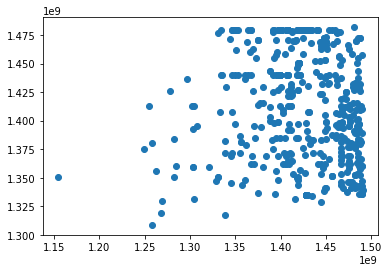

In [61]:
plt.scatter(df_merge['unix_label'],df_merge['unix'])

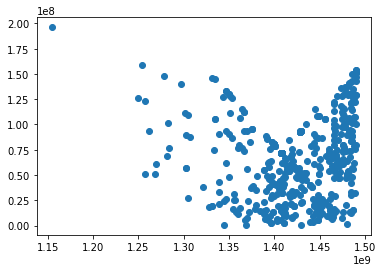

In [62]:
fig=plt.figure()
plt.scatter(df_merge['unix_label'],df_merge['unix_diff'])

In [63]:
list_of_diffs=pd.Series( df_merge['unix_diff'])
new_list=list_of_diffs.dropna()
print list_of_diffs.isnull().sum()
print new_list.isnull().sum()

86743
0


87011   1972-07-11 00:00:00
87012   1973-03-12 23:00:00
87026   1971-09-15 23:00:00
87201   1971-11-08 00:00:00
87204   1970-12-25 00:00:00
Name: unix_diff, dtype: datetime64[ns]


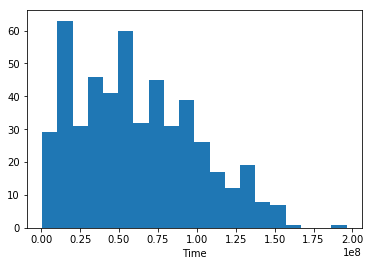

In [64]:
date_list=pd.to_datetime(new_list,unit='s')
print date_list.tail()
plt.hist(new_list,bins=20)
plt.xlabel('Time')


In [65]:
print new_list.mean()/3600/24/365
print new_list.min()/3600/24/365
print new_list.max()/3600/24/365
print new_list.median()/3600/24/365


1.95006292022
0.0191780821918
6.22191780822
1.78904109589


In [66]:
df_merge['diff_years']=df_merge['unix_diff'].apply(lambda x: x/31543600.0)

In [67]:
df_merge['diff_years'].mean()

1.949593079165614

In [68]:
list_of_diffs_yrs=pd.Series( df_merge['diff_years'])
new_list_yrs=list_of_diffs_yrs.dropna()
print list_of_diffs_yrs.isnull().sum()
print new_list_yrs.isnull().sum()

86743
0


In [69]:
under_1=[]
under_2=[]
under_3=[]
for item in new_list_yrs:
    if item<=3:
        under_3.append(item)
    if item<=2:
        under_2.append(item)
    if item<=1:
        under_1.append(item)
print len(new_list_yrs)
print len(under_3), 'under 3 years'
print len(under_2), 'under 2 years'
print len(under_1), 'under 1 year'



508
410 under 3 years
283 under 2 years
140 under 1 year


87011   1972-07-11 00:00:00
87012   1973-03-12 23:00:00
87026   1971-09-15 23:00:00
87201   1971-11-08 00:00:00
87204   1970-12-25 00:00:00
Name: unix_diff, dtype: datetime64[ns]


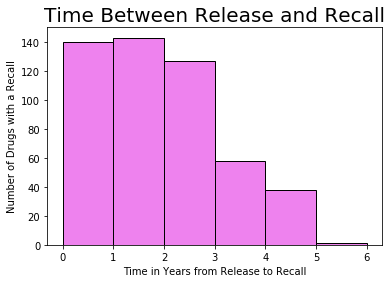

In [148]:
date_list=pd.to_datetime(new_list,unit='s')
print date_list.tail()
plt.hist(new_list_yrs,bins=[0,1,2,3,4,5,6],color='violet',edgecolor='black')
plt.xlabel('Time in Years from Release to Recall')
plt.ylabel('Number of Drugs with a Recall')
plt.title('Time Between Release and Recall',size=20)
plt.savefig("hist_time_until_recall.png")

In [75]:
df_merge['under_3']=df_merge['diff_years'].apply(lambda x: 1 if x<=3 else 0)
df_merge['under_2']=df_merge['diff_years'].apply(lambda x: 1 if x<=2 else 0)
df_merge['under_1']=df_merge['diff_years'].apply(lambda x: 1 if x<=1 else 0)

In [76]:
#df_merge['target'].sum()

In [69]:
df_merge.to_csv('NDC-drugs-with-recalls.csv')

In [77]:
df_merge.head()

,Unnamed: 0_label,Unnamed: 0.1,abuse,accessories,active_ingredient,adverse_reactions,alarms,animal_pharmacology_and_or_toxicology,ask_doctor,ask_doctor_or_pharmacist,...,unix,good_ndcs,company_recall,product_recall,unix_label,unix_diff,diff_years,under_3,under_2,under_1
0,0,0,0,0,NaN,[u'6 ADVERSE REACTIONS Adults: Most common adv...,0,1,0,0,...,NaN,NaN,NaN,NaN,1.372828e+09,NaN,NaN,0,0,0
1,1,1,0,0,NaN,[u'6 ADVERSE REACTIONS Most common adverse rea...,0,0,0,0,...,NaN,NaN,NaN,NaN,1.372741e+09,NaN,NaN,0,0,0
2,2,2,0,0,NaN,"[u'ADVERSE REACTIONS (listed alphabetically, u...",0,0,0,0,...,NaN,NaN,NaN,NaN,1.372741e+09,NaN,NaN,0,0,0
3,3,3,0,0,[u'adenosine'],NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,1.373519e+09,NaN,NaN,0,0,0
4,4,4,0,0,NaN,"[u'ADVERSE REACTIONS: In general, the adverse ...",0,0,0,0,...,NaN,NaN,NaN,NaN,1.373260e+09,NaN,NaN,0,0,0


In [91]:
print df_merge[df_merge['unq_ndc']=='68462-792']

      Unnamed: 0_label  Unnamed: 0.1  abuse  accessories active_ingredient  \
4344              5929          5929      0            0               NaN   

                                      adverse_reactions  alarms  \
4344  [u'ADVERSE REACTIONS Virtually all patients ex...       0   

      animal_pharmacology_and_or_toxicology  ask_doctor  \
4344                                      0           0   

      ask_doctor_or_pharmacist   ...     unix  good_ndcs  company_recall  \
4344                         0   ...      NaN        NaN             NaN   

      product_recall    unix_label unix_diff  diff_years  under_3 under_2  \
4344             NaN  1.484633e+09       NaN         NaN        0       0   

      under_1  
4344        0  

[1 rows x 105 columns]


In [92]:
print df_merge.iloc[4344,]

Unnamed: 0_label                                                                                           5929
Unnamed: 0.1                                                                                               5929
abuse                                                                                                         0
accessories                                                                                                   0
active_ingredient                                                                                           NaN
adverse_reactions                                             [u'ADVERSE REACTIONS Virtually all patients ex...
alarms                                                                                                        0
animal_pharmacology_and_or_toxicology                                                                         0
ask_doctor                                                                                              

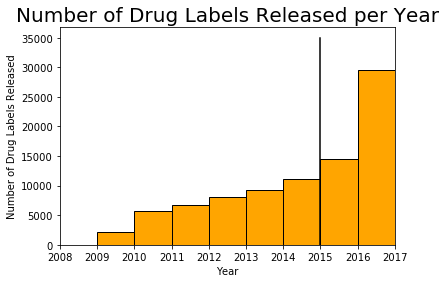

In [143]:
plt.hist(df_merge['year'], bins=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017],color='orange',edgecolor='black')
plt.xlim(2008,2017)
plt.xlabel('Year')
plt.ylabel('Number of Drug Labels Released')
x=[2015,2015]
y=[0,35000]
plt.plot(x,y,color='black')
plt.title('Number of Drug Labels Released per Year',size=20)
plt.savefig('drug_releases_per_year.png')